In [1]:
import pandas as pd
import folium, json

In [3]:
df = pd.read_csv('./static/data/crime_result.csv')
df.set_index('구별', inplace=True)
df.head()

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3313,2611,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,2512,1838,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,4011,2816,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


In [5]:
df['범죄검거율'] = df['검거'] / df['발생'] * 100

In [6]:
df.head()

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159,107.046282
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580,64.802404
용산구,3313,2611,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310,78.810746
성동구,2512,1838,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990,73.168790
광진구,4011,2816,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967,70.206931


In [7]:
df[df['범죄검거율'] >= 100]

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.0,100.0,100.0,70.561056,90.874159,107.046282


In [8]:
df.loc[df['범죄검거율'] > 100, '범죄검거율'] = 100

In [9]:
df.head()

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159,100.000000
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580,64.802404
용산구,3313,2611,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310,78.810746
성동구,2512,1838,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990,73.168790
광진구,4011,2816,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967,70.206931


In [10]:
df.to_csv('./static/data/crime_result.csv', sep=',', encoding='utf8')

In [12]:
crime = pd.read_csv('./static/data/crime_result.csv')
crime.set_index('구별', inplace=True)
crime.head()

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159,100.000000
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580,64.802404
용산구,3313,2611,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310,78.810746
성동구,2512,1838,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990,73.168790
광진구,4011,2816,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967,70.206931


In [16]:
geo_path = './static/data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [17]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = crime['발생'],
                columns = [crime.index, crime['발생']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [18]:
option_dict = {
    'crime':'범죄 발생 건수', 'murder':'살인 발생 건수', 
    'rob':'강도 발생 건수', 'rape':'강간 발생 건수',
    'thief':'절도 발생 건수', 'force':'폭력 발생 건수',
    'a_crime':'범죄 검거율', 'a_murder':'살인 검거율', 
    'a_rob':'강도 검거율', 'a_rape':'강간 검거율',
    'a_thief':'절도 검거율', 'a_force':'폭력 검거율'
}

In [20]:
crime

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159,100.000000
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580,64.802404
용산구,3313,2611,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310,78.810746
성동구,2512,1838,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990,73.168790
광진구,4011,2816,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967,70.206931
동대문구,3692,2818,6,10,168,1531,1977,100.000000,90.000000,85.119048,54.016982,92.716237,76.327194
중랑구,4268,3138,10,4,138,1666,2450,100.000000,100.000000,78.260870,54.501801,86.000000,73.523899
성북구,2877,2323,3,3,176,1082,1613,100.000000,100.000000,73.863636,67.560074,90.266584,80.743830
강북구,3838,3023,6,3,176,1229,2424,100.000000,66.666667,82.386364,54.027665,91.006601,78.764982


In [3]:
import os

In [6]:
coffee = pd.read_csv('./static/upload/커피지수.csv')
coffee.head()

,ID,y,x,스타벅스 수,커피빈 수,이디야 수,빽다방 수,커피지수
0,강릉,3,11,5.0,0.0,14.0,2.0,0.312500
1,고성(강원),0,10,2.0,0.0,1.0,0.0,2.000000
2,동해,4,11,1.0,1.0,1.0,1.0,1.000000
3,삼척,5,11,1.0,0.0,1.0,2.0,0.333333
4,속초,1,10,4.0,0.0,8.0,0.0,0.500000


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import os
from tqdm import tqdm_notebook
from glob import glob 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
draw_korea = pd.read_csv('./static/data/draw_korea.csv')
coffee = pd.read_csv('./static/upload/커피지수.csv')

In [3]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), (11,4), (11,3)], # 경기
    [(8,10), (8,11), (6,11), (6,12)], # 강원
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충북
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전북
    [(13,5), (13,6), (16,6)], # 대전
    [(13,5), (14,5)], #세종
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전남
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충남
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경북
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [4]:
def drawKorea(targetData, blockedMap, cmapname, save_path):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0],row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        plt.annotate(dispname, (row['x']+0.5,row['y']+0.5), weight='bold',
            fontsize=fontsize, ha='center', va='center',
            linespacing=linespacing)
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs,ys,c='black', lw=1.5)
    plt.gca().invert_yaxis()

    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig(save_path)

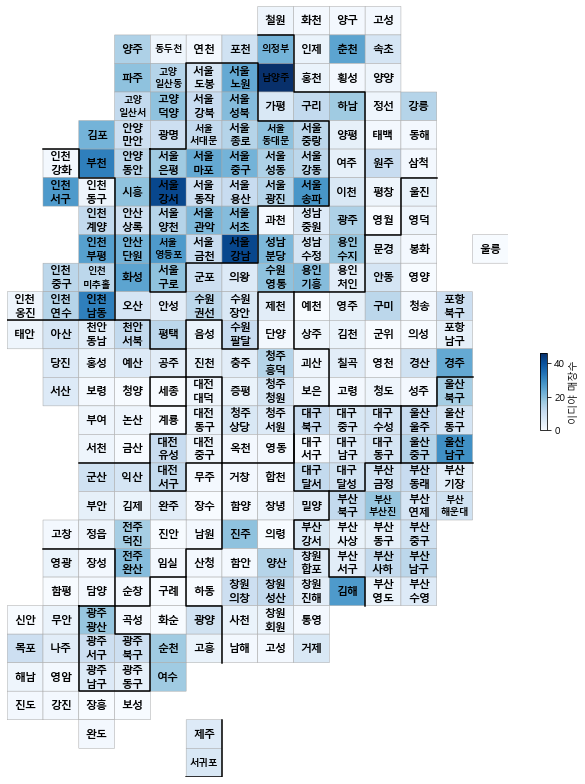

In [6]:
img_file = 'D:/Workspace/Flask-Web-2020/03_DataAnalysisModule' + '/static/img/tmp.png'
drawKorea('이디야 매장수', coffee, 'Blues', img_file)

In [13]:
cafe_result.sort_values(by='커피지수', ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        250 non-null    object 
 1   y         250 non-null    int64  
 2   x         250 non-null    int64  
 3   스타벅스 매장수  250 non-null    float64
 4   커피빈 매장수   250 non-null    float64
 5   이디야 매장수   250 non-null    float64
 6   빽다방 매장수   250 non-null    float64
 7   커피지수      250 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.8+ KB
